# 1.1 | Business Goal

In the age of the Great Resignation, employee retention strategies have become a critical area of focus for many organizations. There are often a variety of reasons why employees leave an organization that vary from industry to industry. In this case study, I will examine some of the commonalities between former employees and identify key drivers of attrition to assist the HR Department strengthen their retention strategies and proactively reduce their attrition rates.

In [346]:
#load libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [347]:
data = pd.read_csv('Employee_Attrition.csv')
empdf = data.copy()

In [348]:
empdf.shape

(1470, 35)

In [349]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Description about the data
Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

# EDA Categorical Features

83.87755155563354
16.122448444366455


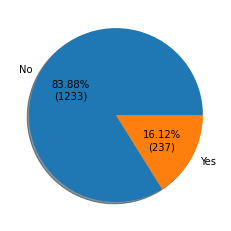

In [350]:
def per_val(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = empdf['Attrition'].value_counts()
total = len(empdf['Attrition'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=per_val, shadow=True);

In [351]:
empdf.isnull().sum().sum()

0

In [352]:
categorical_features = empdf.select_dtypes(include=[np.object]).columns
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [353]:

cat_df=pd.DataFrame(empdf[categorical_features].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(empdf.select_dtypes(include=object).describe())
display(cat_df)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

In [354]:
def plt_bar(i):
    plt.figure(figsize=(12,5))
    ax=sns.countplot(x=empdf[i], hue="Attrition", data=empdf,palette='crest')
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
            ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")
    plt.xticks(rotation=45)
    plt.show()


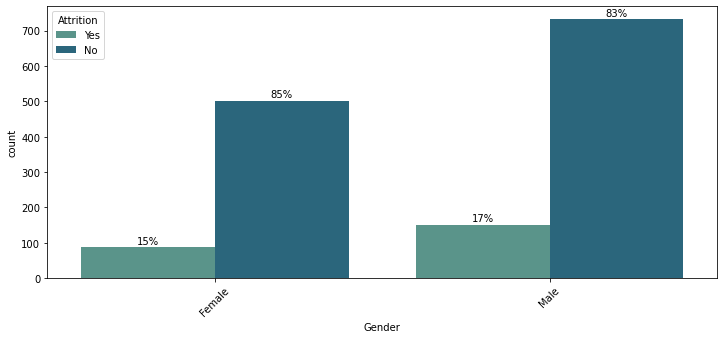

In [355]:
plt_bar('Gender')

Males are more under Attrition then Females

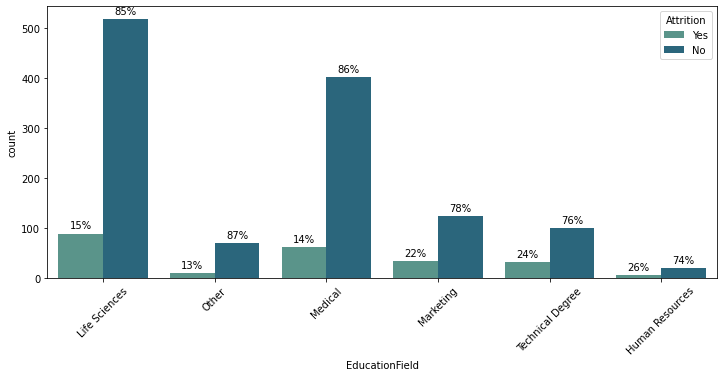

In [356]:
plt_bar('EducationField')

The employees are more who have Medical and life sciences education

% Attition of employees is more who are from HR or have a technical degree

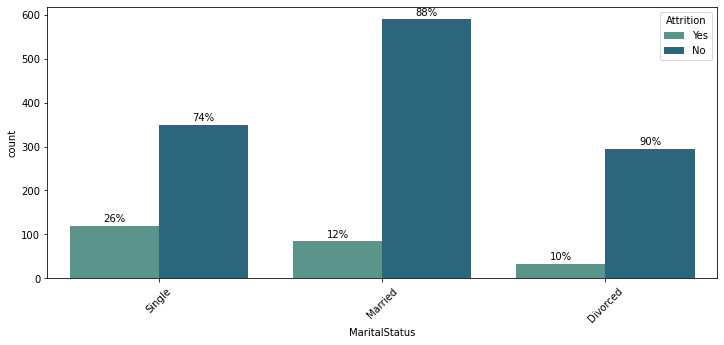

In [357]:
plt_bar('MaritalStatus')

The employees are more who are married

% Attition of employees is who are single

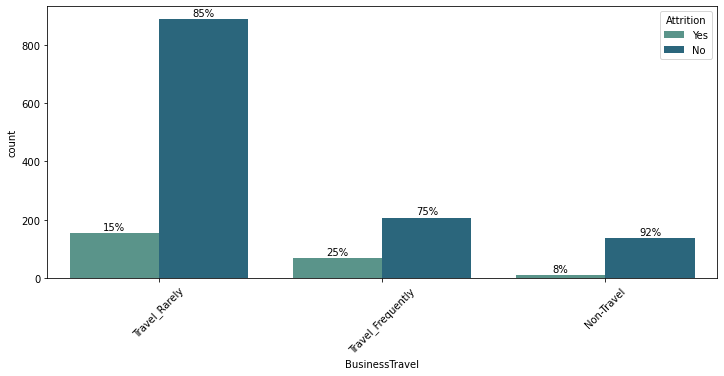

In [358]:
plt_bar('BusinessTravel')

The employees are more who travel very rare, 

% Attition of employees is more who travel frequently.

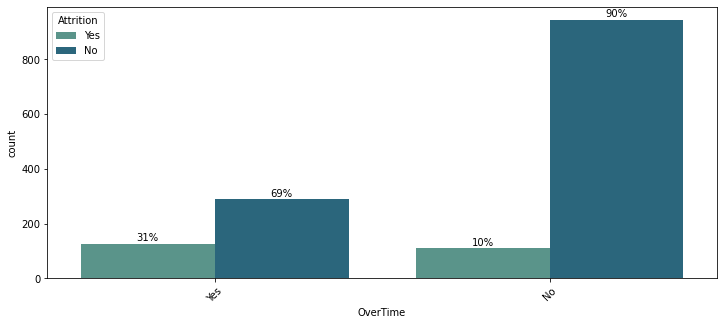

In [359]:
plt_bar('OverTime')

Employees who do overtime are more likely to leave their job early.

In [360]:
# how many male and female do overTime
pd.crosstab(empdf['OverTime'], empdf['Gender'])

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


Females who do overtime are more likely to leave their job early

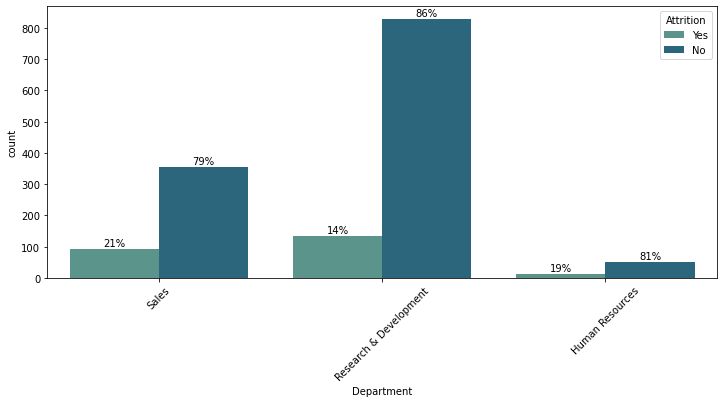

In [361]:
plt_bar('Department')

Employees working in R&D department are more, but employees from sales department leave the job early.

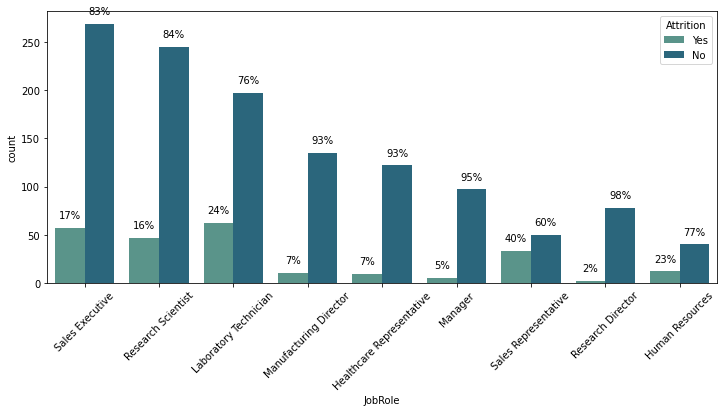

In [362]:
plt_bar('JobRole')

The employees are sales executive and research scientist are more

% Attition of employees is higher who are in sales representative role

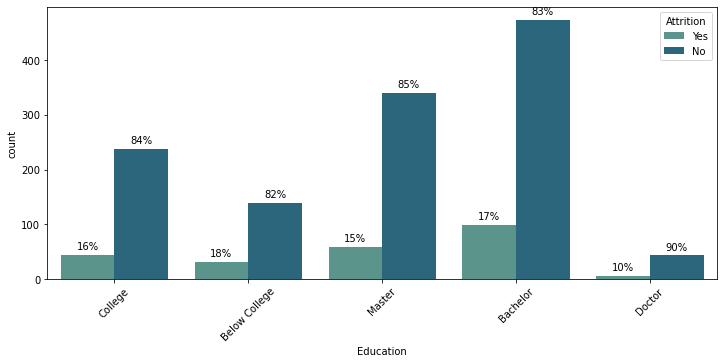

In [363]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
empdf['Education'] = empdf['Education'].map(edu_map)
plt_bar('Education')

Employees with Bachelors degree are more likely to leave the organistaion

Workers with low employee satisfaction rating are more likely to leave the organisation

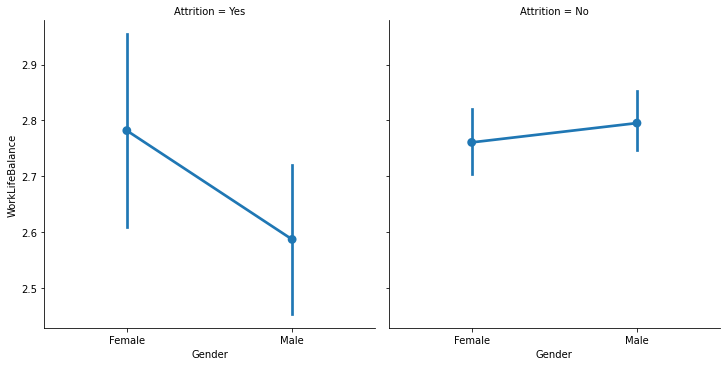

In [364]:
sns.factorplot(x='Gender', y='WorkLifeBalance', col='Attrition', data=empdf)

Work life balance is important deciding factor for males 

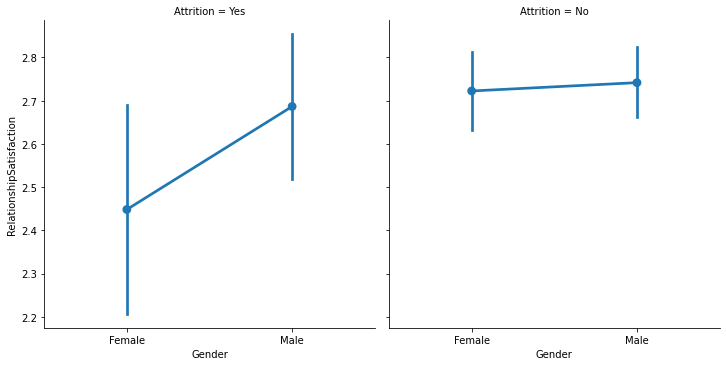

In [365]:
sns.factorplot(x='Gender', y='RelationshipSatisfaction', col='Attrition', data=empdf)

Relationship satisfaction plays an important role for female during attrition

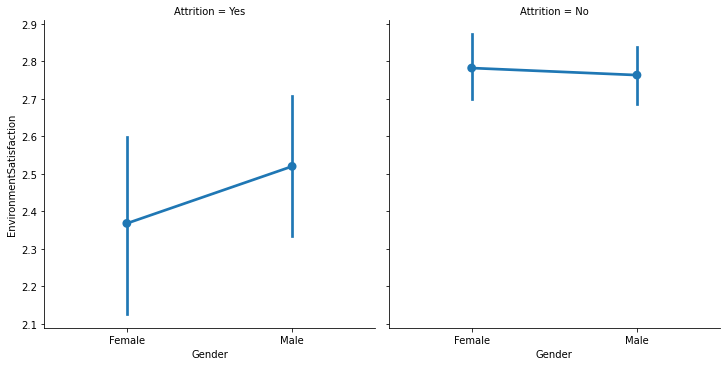

In [366]:
sns.factorplot(x='Gender', y='EnvironmentSatisfaction', col ='Attrition', data=empdf)

Environment satisfaction plays an important role for both genders before making decision to leave the organisation but more so for female employees.

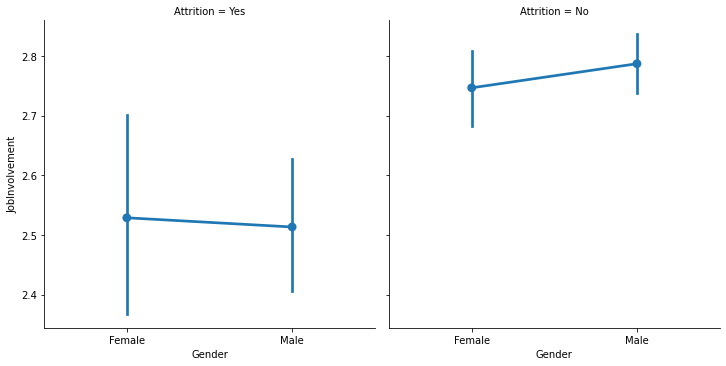

In [367]:
sns.factorplot(x='Gender', y='JobInvolvement', col='Attrition', data=empdf)

Job involvement plays an important role for both genders before making decision to leave the organisation

# EDA Numerical Features

In [368]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O']
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,2,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,1,4,4,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,1,5,4,56,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,4,80,1,6,3,3,2,2,2,2


# How is attrition dependent on Age?

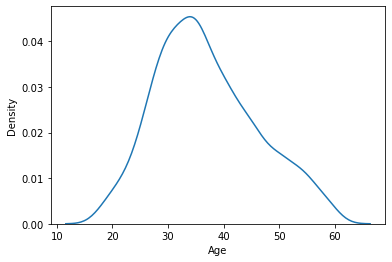

In [369]:
# distribution of age
sns.distplot(empdf['Age'],hist=False)
plt.show()

Age column is very well normalized, most of employees are age between 25 to 40.

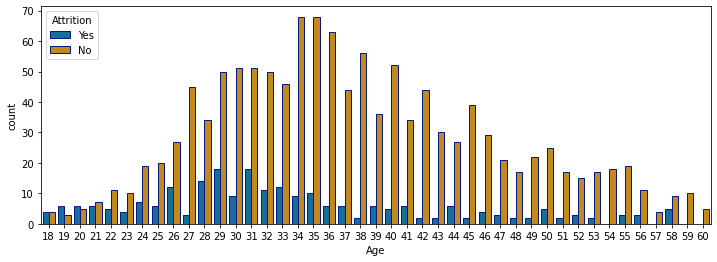

In [370]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Age', hue='Attrition', data = empdf, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.show()

Most of the attrition is between the age group of 25 - 35

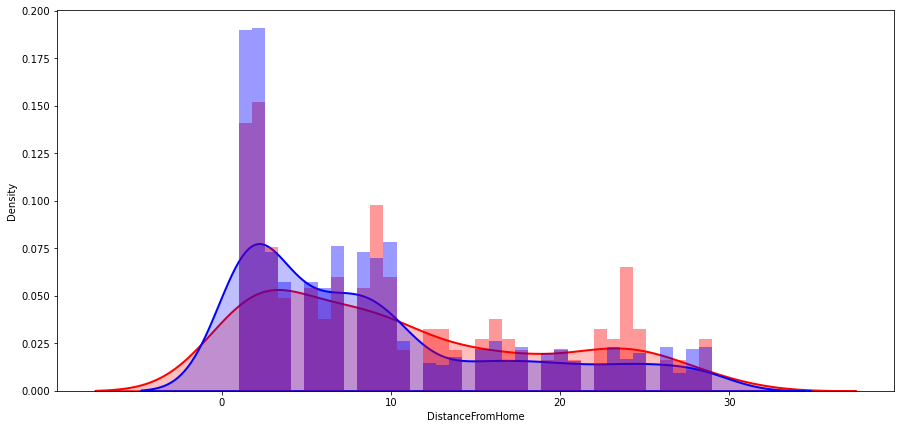

In [371]:
yes_attrition_df = (empdf[empdf['Attrition']=='Yes']).copy()
no_attrition_df = (empdf[empdf['Attrition']=='No']).copy()
plt.figure(figsize=(15,7))
sns.distplot(yes_attrition_df['DistanceFromHome'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Left the Organization")

sns.distplot(no_attrition_df['DistanceFromHome'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',  
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Stayed back organization")

plt.show()

Attrition distribution has more fat tail towards right and is right skewed which indicates as distance from home increases an employee is more likely to leave the organistaion

# Is income the main factor towards employee attrition?

<AxesSubplot:xlabel='Gender', ylabel='HourlyRate'>

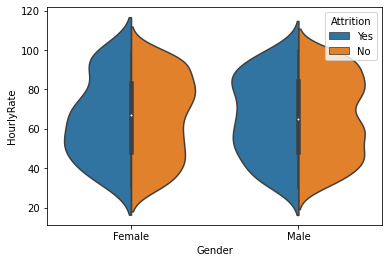

In [372]:
sns.violinplot(x="Gender", y="HourlyRate", hue="Attrition", data=empdf, split=True)

Males are paid higher on hourly rate basis compared to females

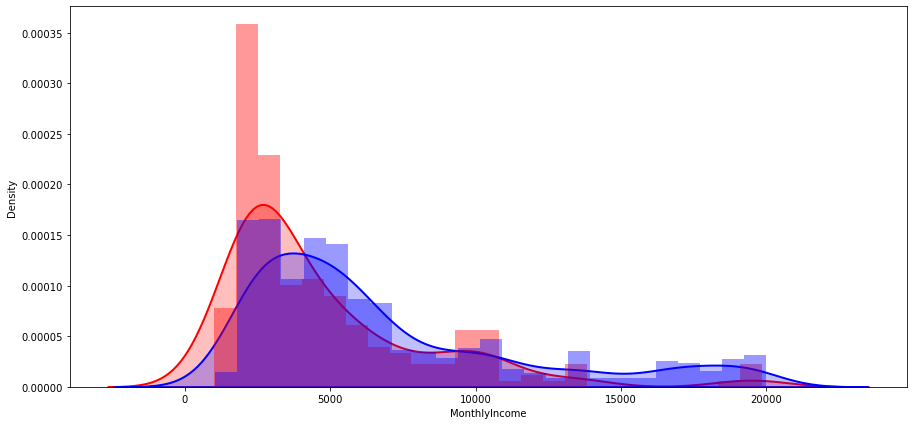

In [373]:
plt.figure(figsize=(15,7))
sns.distplot(yes_attrition_df['MonthlyIncome'], hist=True, kde=True, 
             bins=25, color = 'red', 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Left the Organization")

sns.distplot(no_attrition_df['MonthlyIncome'], hist=True, kde=True, 
             bins=25, color = 'blue',  
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Stayed back organization")

plt.show()

As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line.

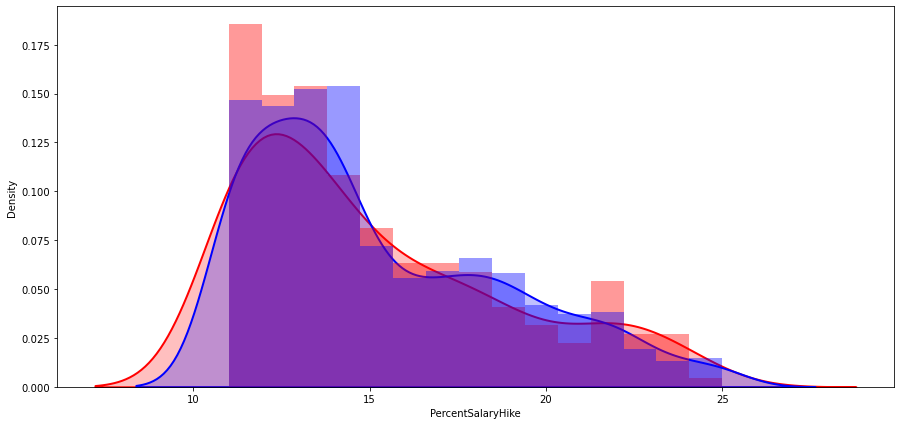

In [374]:
plt.figure(figsize=(15,7))
sns.distplot(yes_attrition_df['PercentSalaryHike'], hist=True, kde=True, 
             bins=15, color = 'red', 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Left the Organization")

sns.distplot(no_attrition_df['PercentSalaryHike'], hist=True, kde=True, 
             bins=15, color = 'blue',  
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Stayed back organization")

plt.show()

Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

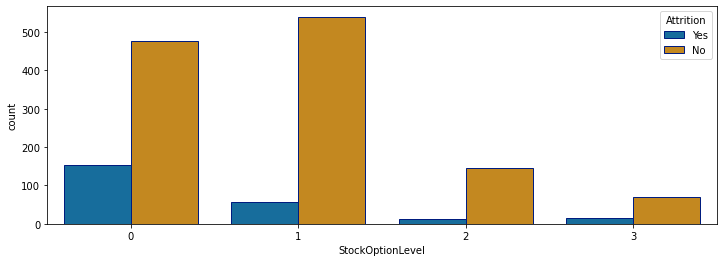

In [375]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='StockOptionLevel', hue='Attrition', data = empdf, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.show()

The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

# How does work experience affect attrition?

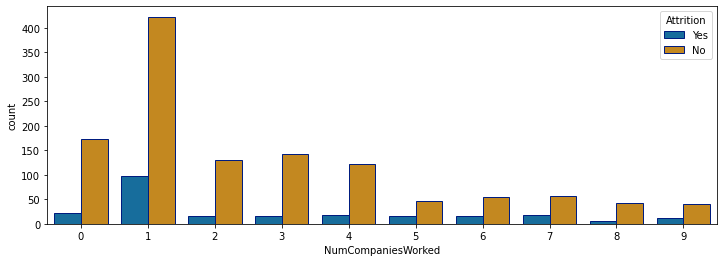

In [376]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='NumCompaniesWorked', hue='Attrition', data = empdf, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.show()

As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

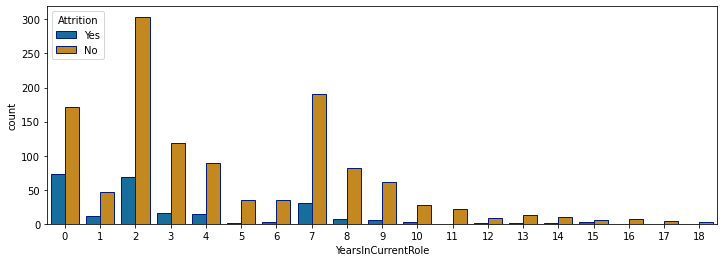

In [377]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='YearsInCurrentRole', hue='Attrition', data = empdf, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.show()

We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

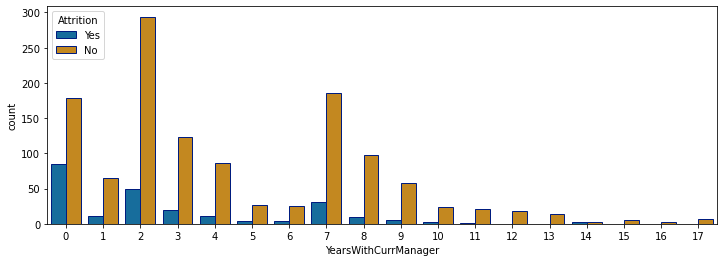

In [378]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='YearsWithCurrManager', hue='Attrition', data = empdf, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.show()

At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

# Feature Engineering

In [379]:
#drop the columns which are unrelevant for Attrition prediction. 
empdf.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

# Categorical Encoding

In [380]:
# Target Variable(Attrition)
empdf['Attrition'] = empdf['Attrition'].replace({'No':0,'Yes':1})

In [381]:
#encode binary variables
empdf['OverTime'] = empdf['OverTime'].map({'No':0,'Yes':1})
empdf['Gender'] = empdf['Gender'].map({'Male':0,'Female':1})

In [382]:
#encode categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Education']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(empdf[col].value_counts().index,0)}
    empdf[col] = empdf[col].map(map_dict)

In [383]:
# drop the Over18 column
empdf.drop('Over18',axis=1,inplace=True)

# Correlation Analysis

In [384]:
empdf.corr()['Attrition'][:-1].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
Department                  0.077351
EducationField              0.062320
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
MaritalStatus               0.011195
PerformanceRating           0.002889
BusinessTravel             -0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.014938
JobRole                    -0.027930
Gender                     -0.029453
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Age                        -0.159205
MonthlyIncome              -0.159840
Y

In [385]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,3,0,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,1,0,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,3,1,1,0,...,3,4,1,6,3,3,2,2,2,2


# FeatureSelection

In [386]:
x = empdf.drop('Attrition',axis=1)
y = empdf['Attrition']

In [387]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

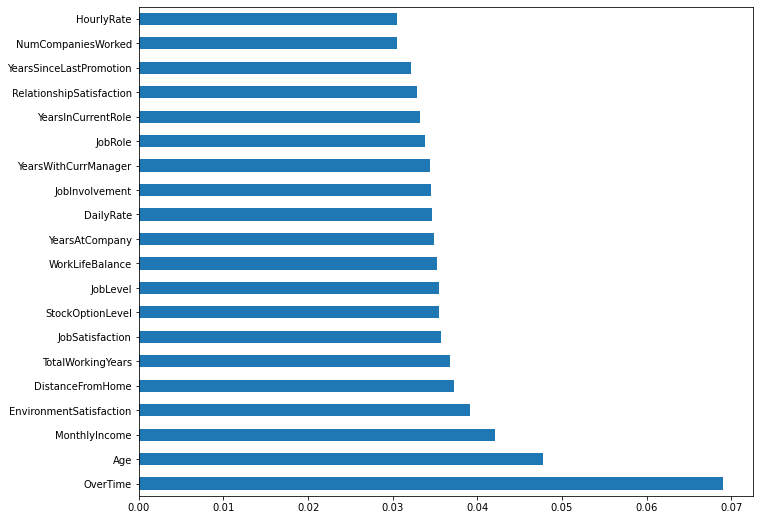

In [388]:
#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

OBSERVATIONS: Factors Responsible for Employee Attrition

OverTime has highest relationship with Attrition, Employee who do OverTime, changes or leaves the Job early. we have seen this above also during categorical variable analysis.

Age is 2nd factor responsible, it can be that who are senior, are retiring or the employees who are bachelor has more expectations more organization.

MonthlyIncome is also a greatest factor for employee to Attritate

StockOptionLevel, we have seen can be determing factor, because employees are in chance that they should be given priority and power and consider to have involvement to buy Company stocks.

EnvironmentSatisfaction, JobSatisfaction, DistanceFromHome, WorkLifeBalance, JobLevel is at same level affects equally to the organization employees base.

# Feature Selection with Feature Scaling

In [389]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

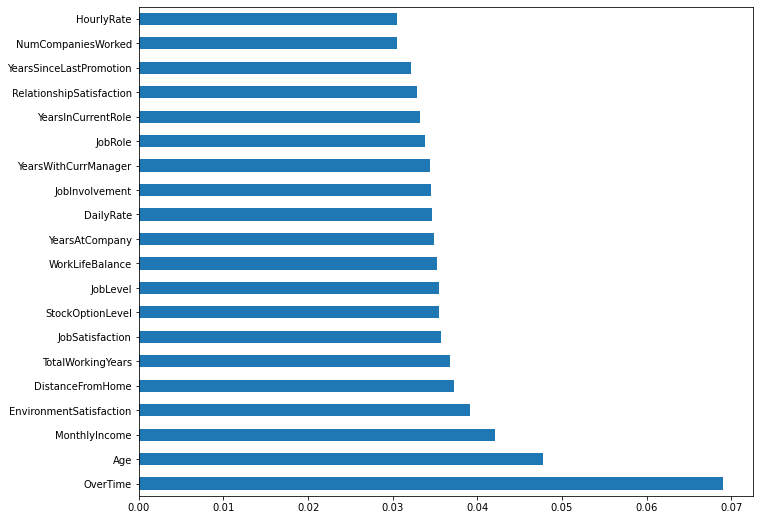

In [390]:
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)

plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

# Modelling

In [391]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

In [392]:
#split data into train and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [393]:
#models
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [394]:
#first check the accuracy score on without scalled features
for clf in [log_clf, dt_clf, rf_clf]:
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.8695652173913043
DecisionTreeClassifier   0.7934782608695652
RandomForestClassifier   0.8777173913043478


In [395]:
# if we do same thing on scaled features
#split data into train and test set using scaled data.
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [396]:
# Now check the accuracy score on scalled features
for clf in [log_clf, dt_clf, rf_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.8994565217391305
DecisionTreeClassifier   0.8043478260869565
RandomForestClassifier   0.8722826086956522


# Summary

1. People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization.

2. Salary and stock ptions have a great motivation on the employees and people tend to leave the organization much lesser. Higher pay and more stock options have seen more employees remain loyal to their company.

3. Work life balance is a great motivation factor for the employees. However, people with a good work-life balance, tend to switch in search of better opportunities and a better standard of living.

4. Departments where target meeting performance is very much crucial (for e.g. Sales) tend to have a greater chances of leaving the organization as compared to departments with more administration perspective (For e.g. Human Resources)

5. People with a good Job Satisfaction and Environment satisfaction are loyal to the organization- and this speaks loud for any Organization. However, people who are not much satisfied with their current project- tend to leave the organization far more.